<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" style="margin-top: 10px;" />

<h1 style="color:#336699; font-weight: normal; margin-top: 0;">Classificação de Áreas Agrícolas no Oeste da Bahia</h1>
<hr style="border: 2px solid #0077b9; margin-top: 5px; margin-bottom: 20px;" />

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb" target="_blank">
        <img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" alt="NBViewer badge" />
    </a>
</div>

<br/>

<div style="text-align: center; font-size: 90%; color: #333;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132" target="_blank">
        <i class="fab fa-lg fa-orcid" style="color: #a6ce39;"></i></a></sup>, 
    Felipe Souza<sup><a href="https://orcid.org/0000-0002-5826-1700" target="_blank">
        <i class="fab fa-lg fa-orcid" style="color: #a6ce39;"></i></a></sup>, 
    Felipe Menino<sup><a href="https://orcid.org/0000-0001-7534-0219" target="_blank">
        <i class="fab fa-lg fa-orcid" style="color: #a6ce39;"></i></a></sup>, 
    Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219" target="_blank">
        <i class="fab fa-lg fa-orcid" style="color: #a6ce39;"></i></a></sup>
    <br/><br/>
    Divisão de Geoinformática e Observação da Terra, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contatos: <a href="mailto:efelipecarlos@gmail.com">efelipecarlos@gmail.com</a>, <a href="mailto:lipecaso@gmail.com">lipecaso@gmail.com</a>
</div>

<br/>

<div style="text-align: justify; margin-left: 15%; margin-right: 15%;">
    <b>Resumo</b><br>
    <code>sits</code> é um software de código aberto voltado a análise de séries temporais de imagens de satélite. Este notebook apresenta as principais funcionalidades do <code>sits</code>, partindo da criação de um cubo de dados até a geração de um mapa de classificação de uso e cobertura da terra. 

</div>    

<br/>

<div style="text-align: justify; margin-left: 15%; margin-right: 15%; font-size: 90%; border: 1px solid #0077b9; border-radius: 6px; padding: 10px;">
    <b>Para um aprofudamento e  discussão completa sobre o <code>sits</code>, consulte o livro em: </b><a href="https://e-sensing.github.io/sitsbook/" target="_blank">Satellite Image Time Series Book</a>.
</div>


## Ambiente
<hr style="border:1px solid #0077b9;">

Esta seção configura o ambiente de execução deste notebook. As configurações apresentadas não são requisitos do `sits`, mas sim do ambiente utilizado no minicurso.

Instalação da nova versão do `sits`

In [ ]:
sitsdir <- '~/sitslib'; dir.create(sitsdir, showWarnings = FALSE); .libPaths( c( sitsdir, .libPaths()) )

devtools::install_cran("sits", dependencies = FALSE, destdir = sitsdir)
devtools::install_cran("tmap", dependencies = FALSE, destdir = sitsdir)
devtools::install_cran("randomForestExplainer", dependencies = FALSE, destdir = sitsdir)

Configuração das dimensões dos plots 

In [45]:
options(repr.plot.width = 12, repr.plot.height = 12)

## Workflow
<hr style="border:1px solid #0077b9;">

O pacote `sits` disponibiliza funções simples que possibilitam uma rápida criação de mapas de uso e cobertura da terra. **Apenas 6 funções** são necessárias para fazer uma classificação. Essas funções são apresentadas abaixo: 

<div style="display: flex; align-items: center; background-color: #fdfdfd; border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 15px 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05); margin-top: 10px">
  <div style="flex: 1; font-size: 15px; color: #333;">
    <strong><code>sits_cube()</code></strong><br>
    <p style='margin-top: 5px'>
   Essa é a primeira função executada no sits. Ela realiza a criação de um cubo de dados de imagens satélites.
    </p>
  </div>
  <div style="margin-left: auto;">
    <img src="images/operations/cube.png" alt="cube icon" style="width: 100px; object-fit: contain;" />
  </div>
</div>

<p style="text-align: center; font-size: 24px; margin: -10px 0 -10px 0; padding: 10px">⇩</p>

<div style="display: flex; align-items: center; background-color: #fdfdfd; border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 15px 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">

  <div style="flex: 1; font-size: 15px; color: #333;">
    <strong><code>sits_get_data()</code></strong><br>
      <p style='margin-top: 5px'>
    Essa funcão realiza a extração das séries temporais de um cubo de dados a partir de amostras de uso e cobertura da terra.
    </p>
  
  </div>

  <div style="margin-left: auto;">
    <img src="images/operations/time-series.png" alt="time-series icon" style="width: 120px; object-fit: contain;" />
  </div>
</div>

<p style="text-align: center; font-size: 24px; margin: -10px 0 -10px 0; padding: 10px">⇩</p>

<div style="display: flex; align-items: center; background-color: #fdfdfd; border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 15px 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">
  <div style="flex: 1; font-size: 15px; color: #333;">
    <strong><code>sits_train()</code></strong><br>
<p style='margin-top: 5px'>
   Eata funcão faz o treinamento de um algoritmo de classifição com base nas séries temporais que foram associadas as amostras.
    </p>
  </div>
  <div style="margin-left: auto;">
    <img src="images/operations/ml-model.png" alt="ml model icon" style="width: 120px; object-fit: contain;" />
  </div>
</div>

<p style="text-align: center; font-size: 24px; margin: -10px 0 -10px 0; padding: 10px">⇩</p>

<div style="display: flex; align-items: center; background-color: #fdfdfd; border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 15px 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">
  <div style="flex: 1; font-size: 15px; color: #333;">
    <strong><code>sits_classify()</code></strong><br>
    Clasifica as séries temporais de um cubo a partir de um modelo treinado.
  </div>
  <div style="margin-left: auto;">
    <img src="images/operations/probs.png" alt="probs icon" style="width: 90px; object-fit: contain;" />
  </div>
</div>

<p style="text-align: center; font-size: 24px; margin: -10px 0 -10px 0; padding: 10px">⇩</p>

<div style="display: flex; align-items: center; background-color: #fdfdfd; border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 15px 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">
  <div style="flex: 1; font-size: 15px; color: #333;">
    <strong><code>sits_smooth()</code></strong><br>
    Suaviza as probabilidades, melhorando a consistência espacial.
  </div>
  <div style="margin-left: auto;">
    <img src="images/operations/probs.png" alt="probs icon" style="width: 90px; object-fit: contain;" />
  </div>
</div>

<p style="text-align: center; font-size: 24px; margin: -10px 0 -10px 0; padding: 10px">⇩</p>

<div style="display: flex; align-items: center; background-color: #fdfdfd; border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 15px 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">
  <div style="flex: 1; font-size: 15px; color: #333;">
    <strong><code>sits_label_classification()</code></strong><br>
    Adiciona rótulos com base nas probabilidades geradas anteriormente.
  </div>
  <div style="margin-left: auto;">
    <img src="images/operations/labels.png" alt="labels icon" style="width: 100px; object-fit: contain;" />
  </div>
</div>

Além dessas funções, diversas outras estão disponíveis no sits, servindo como funcionalidades auxiliares para o fluxo principal apresentado acima.

## Inicialização
<hr style="border:1px solid #0077b9;">

Para começar o uso do `sits`, execute o seguinte comando:

In [1]:
library(sits)

SITS - satellite image time series analysis.

Loaded sits v1.5.1.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.



## Cubos de dados com sits
<hr style="border:1px solid #0077b9;">

Atualmente, há uma grande variedade de dados de Observação da Terra disponíveis por meio de diferentes provedores. O pacote `sits` oferece funções simples que permitem criar cubos de dados a partir dessas diversas fontes, incluindo **B**razil **D**ata **C**ube (BDC), **A**mazon **W**eb **S**ervices (AWS), **M**icrosoft **P**lanetary **C**omputer (MPC), entre outros.

A figura abaixo ilustra como a função `sits_cube()` pode ser utilizada para criar um cubo de dados utilizando diferentes provedores:

<div style="text-align: center">
    <img src="images/workflow/workflow-step-1.png" alt="labels icon" style="width: 80%"/>
</div>

### Carregando cubos de dados do Brazil Data Cube (INPE)

Entre os provedores suportados pelo `sits` está o BDC, cujos cubos podem ser carregados com a função `sits_cube()`:

In [3]:
cube <- sits_cube(
    source     = "BDC",
    collection = "SENTINEL-2-16D",
    tiles      = "030019",
    start_date = "2019-10-01",
    end_date   = "2020-09-30"
)

  |======================================================================| 100%


In [16]:
print(cube)

# A tibble: 1 × 12
  source collection     satellite sensor tile    xmin   xmax   ymin   ymax crs  
  <chr>  <chr>          <chr>     <chr>  <chr>  <dbl>  <dbl>  <dbl>  <dbl> <chr>
1 BDC    SENTINEL-2-16D SENTINEL… MSI    0300… 5.79e6 5.90e6 9.84e6 9.95e6 "PRO…
# ℹ 2 more variables: labels <list>, file_info <list>


<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; background-color: #fdfdfd; margin-top: 10px; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> 🔍 Mais opções para filtragem de dados</summary>

  ### Filtro temporal

  Caso você queira carregar um cubo de dados com imagens de um período temporal diferente, você pode alterar os parâmetros `start_date` e `end_date` da função `sits_cube()`. Abaixo, alguns exemplos são apresentados:

  #### Cubo com dados de 2018

  ```R
    cube <- sits_cube(
        # Provedor
        source = "BDC",
    
        # Coleção
        collection = "SENTINEL-2-16D",
        
        # Extensão espacial
        tiles = "030019",
    
        # Extensão temporal
        start_date = "2018-01-01",
        end_date = "2018-09-30"
    )
  ```

  #### Cubo com dados de 2022

  ```R
    cube <- sits_cube(
        # Provedor
        source = "BDC",
    
        # Coleção
        collection = "SENTINEL-2-16D",
        
        # Extensão espacial
        tiles = "030019",
    
        # Extensão temporal
        start_date = "2022-01-01",
        end_date = "2022-09-30"
    )
  ```

  ### Filtro espacial

  O sits também multiplas formas de selectionar a região de interesse. No exemplo acima, foi mostrado o uso do `tiles`, o qual especifica o tile BDC desejado. Além desse argumento, também é possível utilizar o `roi`. Esse parâmetro permite especificar a região de interesse com um shapefile, bbox e outros formatos.

  Abaixo, são apresentados diversos exemplos de como esse parâmetro pode ser utilizado:

  #### Utilização do ROI com shapefile

  ```R
    cube <- sits_cube(
        # Provedor
        source = "BDC",
    
        # Coleção
        collection = "SENTINEL-2-16D",
        
        # Extensão espacial
        roi = "/caminho/até/o/shapefile",
    
        # Extensão temporal
        start_date = "2022-01-01",
        end_date = "2022-09-30"
    )
  ```

  #### Utilização do ROI com objeto sf

  ```R
    sf_object <- sf::...


    cube <- sits_cube(
        # Provedor
        source = "BDC",
    
        # Coleção
        collection = "SENTINEL-2-16D",
        
        # Extensão espacial
        roi = sf_object,
    
        # Extensão temporal
        start_date = "2022-01-01",
        end_date = "2022-09-30"
    )
  ```
</details>

<div style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; background-color: #fdfdfd; padding: 15px 20px; font-size: 15px; color: #333; line-height: 1.5; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">
  Para mais informações sobre os provedores de dados suportados pelo <code>sits</code>, consulte o capítulo 
  <a href="https://e-sensing.github.io/sitsbook/earth-observation-data-cubes.html" target="_blank" style="color: #1f70b8; text-decoration: none;">
    Earth Observation Data Cubes
  </a> do livro oficial do <code>sits</code>.
</div>

### Explorando características do cubo 
<hr style="border:1px solid #0077b9;">

In [7]:
sits_timeline(cube)

[1] "2019-09-30" "2019-10-16" "2019-11-01" "2019-11-17" "2019-12-03"
 [6] "2019-12-19" "2020-01-01" "2020-01-17" "2020-02-02" "2020-02-18"
[11] "2020-03-05" "2020-03-21" "2020-04-06" "2020-04-22" "2020-05-08"
[16] "2020-05-24" "2020-06-09" "2020-06-25" "2020-07-11" "2020-07-27"
[21] "2020-08-12" "2020-08-28" "2020-09-13" "2020-09-29"

In [8]:
sits_bands(cube)

[1] "B01"   "B02"   "B03"   "B04"   "B05"   "B06"   "B07"   "B08"   "B09"  
[10] "B11"   "B12"   "B8A"   "CLOUD" "EVI"   "NBR"   "NDVI"

<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; background-color: #fdfdfd; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> 🔍 Mais sobre multiplas bandas em cubos</summary>

  <p style="margin-top: 5px">
      Ao criar um cubo, o <code>sits</code> carrega automaticamente todas as datas disponíveis para as bandas selecionadas, facilitando o uso dos dados. A figura abaixo ilustra como um cubo com as bandas <code>RED</code>, <code>GREEN</code> e <code>BLUE</code> é materializado.
  </p>

  <div style="text-align: center">
    <img src="images/concepts/cube-structure.png" alt="extract time series view" style="width: 80%"/>
 </div>
</details>

### Visualizando o cubo
<hr style="border:1px solid #0077b9;">

In [ ]:
# Plot the cube
plot(cube, date = "2019-09-30", red = "B11", green = "B8A", blue = "B02")

<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; margin: 20px 0; background-color: #fdfdfd; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> 📊 Mais opções de visualização</summary>

  ### Mais detalhes no `plot()`
  O `sits` permite adicionar mais informações no plot, como especificar uma data, usando `date` e usar bandas específicas com `band`:
  
  ```R
  plot(cube, band = "NDVI", date = "2020-07-11")
  ```
</details>

## Extração de séries temporais do cubo
<hr style="border:1px solid #0077b9;">

Com o cubo criado, é possível extrair séries temporais associadas a amostras de uso e cobertura da terra. Essa operação permite associar o comportamento espectro-temporal às amostras rotuladas.

A figura abaixo ilustra como esse processo pode ser realizado com a função `sits_get_data()`

<div style="text-align: center">
    <img src="images/workflow/workflow-step-2.png" alt="extract time series operation" style="width: 80%"/>
</div>

### Extraíndo séries temporais de amostras na Bahia
<hr style="border:1px solid #0077b9;">

Carregando as amostras

In [18]:
samples <- sf::st_read("./data/raw/samples/LEM_samples.gpkg")

Reading layer `LEM_samples' from data source 
  `/home/jovyan/sbsr-sits-2025/data/raw/samples/LEM_samples.gpkg' 
  using driver `GPKG'
Simple feature collection with 2430 features and 7 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -46.24825 ymin: -12.68425 xmax: -45.86816 ymax: -12.38708
Geodetic CRS:  WGS 84


In [19]:
head(samples)

,crs,longitude,latitude,start_date,end_date,label,cube,geom
,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<POINT [°]>
1,EPSG:4326,-46.24825,-12.63547,2019-09-30,2020-09-29,Cotton,SENTINEL-2-16D,POINT (-46.24825 -12.63547)
2,EPSG:4326,-46.24403,-12.64302,2019-09-30,2020-09-29,Cotton,SENTINEL-2-16D,POINT (-46.24403 -12.64302)
3,EPSG:4326,-46.24288,-12.64363,2019-09-30,2020-09-29,Cotton,SENTINEL-2-16D,POINT (-46.24288 -12.64363)
4,EPSG:4326,-46.24269,-12.63572,2019-09-30,2020-09-29,Cotton,SENTINEL-2-16D,POINT (-46.24269 -12.63572)
5,EPSG:4326,-46.24240,-12.64401,2019-09-30,2020-09-29,Cotton,SENTINEL-2-16D,POINT (-46.2424 -12.64401)
6,EPSG:4326,-46.24197,-12.61537,2019-09-30,2020-09-29,Soybean_Millet,SENTINEL-2-16D,POINT (-46.24197 -12.61537)


Vamos carregar também as cores associadas a cada uma das labels

In [20]:
color_table <- readRDS("./data/raw/colors/colors_lem.rds")

A função `sits_colors_set` é utilizada para indicar para o `sits` quais cores devem ser utilizadas para cada uma das labels disponíveis no conjunto de amostras

In [21]:
sits_colors_set(colors = color_table, legend = "LEM")

Visualizando as amostras

In [23]:
sits_view(samples)

HTML widgets cannot be represented in plain text (need html)

Extraíndo as séries temporais

In [26]:
samples_ts <- sits_get_data(
    cube       = cube,
    samples    = samples,
    multicores = 8
)

although coordinates are longitude/latitude, st_union assumes that they are
planar



<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; background-color: #fdfdfd; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> 🔍 Visualize a extração da série temporal</summary>

  <div style="text-align: center; margin-top: 10px">
    <img src="images/concepts/timeseries-extraction.png" alt="extract time series view" style="width: 80%"/>
 </div>
</details>

<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; background-color: #fdfdfd; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> 📈 Mais opções de extração</summary>

  ### Extração de séries temporais com polígonos
  A função `sits_get_data()` suporta o uso de pontos e polígonos. Para polígonos, é possível definir a quantidade de pontos que serão extraídos de cada polígono usando o parâmetro `n_sam_pol`.

    
  ```R
  samples_ts <- sits_get_data(
    # Cubo de dados que será usado para extração
    cube = cube,

    # Amostras usadas para a extração
    samples = samples,

    # Número de pontos que serão extraídos em cada polígonos
    n_sam_pol = 10,

    # Número de processos usados para otimizar a extraação 
    multicores = 2
  )
```

  Além disso, é possível sumarizar todos os pontos extraídos de um polígono a partir da média através do parâmetro `pol_avg`. A partir da versão `1.5.3` do `sits` não é mais necessário informar o parâmetro `pol_id` para usar essa funcionalidade. 

  ```R
  samples_ts <- sits_get_data(
    # Cubo de dados que será usado para extração
    cube = cube,

    # Amostras usadas para a extração
    samples = samples,

    # Número de pontos que serão extraídos em cada polígonos
    n_sam_pol = 10,

    # Sumariza os pontos de um polígono aplicando a média
    pol_avg = TRUE,

    # Número de processos usados para otimizar a extraação 
    multicores = 2
  )
```
</details>

### Explorando características das séries temporais 
<hr style="border:1px solid #0077b9;">

In [28]:
sits_bands(samples_ts)

[1] "B02"  "B03"  "B04"  "B11"  "B8A"  "NDVI"

In [29]:
sits_timeline(samples_ts)

[1] "2019-09-30" "2019-10-16" "2019-11-01" "2019-11-17" "2019-12-03"
 [6] "2019-12-19" "2020-01-01" "2020-01-17" "2020-02-02" "2020-02-18"
[11] "2020-03-05" "2020-03-21" "2020-04-06" "2020-04-22" "2020-05-08"
[16] "2020-05-24" "2020-06-09" "2020-06-25" "2020-07-11" "2020-07-27"
[21] "2020-08-12" "2020-08-28" "2020-09-13" "2020-09-29"

In [30]:
summary(samples_ts)

label,count,prop
<chr>,<int>,<dbl>
Cerrado,100,0.041152263
Corn,70,0.028806584
Corn_Brachiaria,30,0.012345679
Cotton,550,0.226337449
Millet,10,0.004115226
Pasture,50,0.020576132
Sorghum_Sorghum,10,0.004115226
Soybean,630,0.259259259
Soybean_Brachiaria,160,0.065843621


<div style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; background-color: #fdfdfd; padding: 15px 20px; margin: 20px 0; font-size: 15px; color: #333; line-height: 1.5; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.05);">
  O pacote <code>sits</code> fornece funções para auxiliar na avaliação da qualidade das amostras, consulte o capítulo 
  <a href="https://e-sensing.github.io/sitsbook/improving-the-quality-of-training-samples.html" target="_blank" style="color: #1f70b8; text-decoration: none;">
    Improving the Quality of Training Samples
  </a> do livro oficial do <code>sits</code>.
</div>

#### Visualizando padrões temporais 
<hr style="border:1px solid #0077b9;">

Selecionando uma banda específica do cubo

In [33]:
samples_indexes <- sits_select(samples_ts, bands = "NDVI")

Calcula patterns

In [34]:
patterns <- sits_patterns(samples_indexes) 

Visualização dos patterns

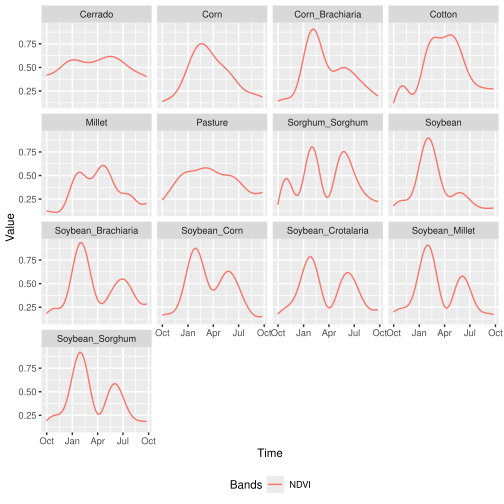

In [35]:
plot(patterns)

<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; background-color: #fdfdfd; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> 🔍 Mais sobre seleção em séries temporais</summary>

  <p style="margin-top: 5px">
      A função <code>sits_select</code> permite selecionar bandas e datas das séries temporais. Os exemplos abaixo mostram como essa operação pode ser utilizada:
  </p>

  #### Selecionando datas

  ```R
  sits_select(
    samples_ts,
    start_date = "2019-12-03",
    end_date = "2020-01-17"
  )
  ```

  #### Selecionando bandas

  ```R
  sits_select(
      samples_ts,
      bands = c("B8A", "NDVI")
  )
  ```
   
   <br/>
   
  **Nota**: A função `sits_select` também pode ser utilizada em cubos de dados.
</details>

## Treinando o modelo de classificação
<hr style="border:1px solid #0077b9;">

Com base nas amostras extraídas, é possível treinar um algoritmo de classificação. Nesse processo, o modelo aprende a associar as amostras aos padrões espectro-temporais.

O treinamento no `sits` é feito com a função `sits_train`. O fluxo abaixo apresenta a utilização desta função.

<div style="text-align: center">
    <img src="images/workflow/workflow-step-3.png" alt="classification model training" style="width: 85%"/>
</div>

### Treinando modelo para amostras na Bahia
<hr style="border:1px solid #0077b9;">

Com as amostras extraídas do cubo, faremos o treinamento de um modelo `Random Forest`.

In [42]:
rfor_model <- sits_train(
  samples   = samples_ts,
  ml_method = sits_rfor()
)

<details style="border: 1px solid #ccc; border-left: 5px solid #1f70b8; border-radius: 8px; padding: 10px 15px; background-color: #fdfdfd; box-shadow: 0 1px 3px rgba(0,0,0,0.05); color: #333;">
  <summary style="font-weight: bold; cursor: pointer; outline: none;"> ⚙️ Mais detalhes sobre os modelos de aprendizado de máquina</summary>
  
  #### Parâmetros adicionais
  Cada modelo tem um conjunto de parâmetros adicionais que podem ser fornecidos. Por exemplo, no método Random Forest podemos definir o número de árvores que serão geradas usando o parâmetro `num_trees`. Cada modelo tem o seu próprio conjunto de parâmetros.  A documentação dos modelos pode ser verificada utilizando `?nome_da_função`. O `sits` fornece valores padões de parâmetros por defeito, mas recomendamos fortemente que consulte a documentação dos modelos.
    
  ```R
  rfor_model <- sits_train(
    # Amostras que serão usadas para o treinamento 
    samples = samples_ts,

    # Parâmetros adicionais do modelo random forest 
    ml_method = sits_rfor(num_trees = 50)
  )
  ```
</details>

### Explorando características do modelo treinado
<hr style="border:1px solid #0077b9;">

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



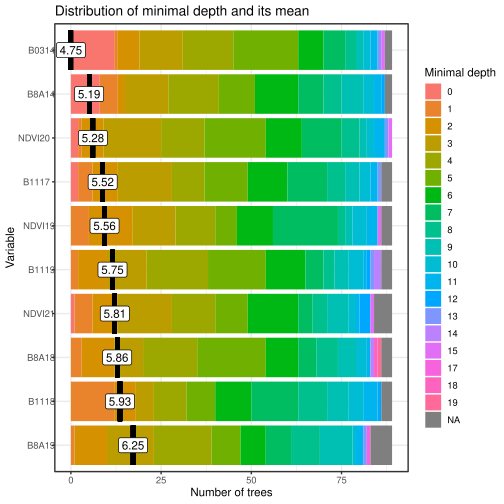

In [43]:
plot(rfor_model)

## Classificação do cubo
<hr style="border:1px solid #0077b9;">

Com o modelo de aprendizado de máquina treinado, é possível gerar um mapa de classificação. Para isso, utiliza-se a função `sits_classify`, conforme ilustrado na figura abaixo.

<div style="text-align: center">
    <img src="images/workflow/workflow-step-4.png" alt="cube classification" style="width: 85%"/>
</div>

### Classificação de uma região na Bahia
<hr style="border:1px solid #0077b9;">

Define um região de interesse

In [44]:
roi <- c(
    lon_min = -46.24898,
    lat_min = -12.68681,
    lon_max = -45.86688,
    lat_max = -12.38479 
)

Geração das probabilidades

In [ ]:
probs <- sits_classify(
    data       = cube,
    ml_model   = rfor_model,
    multicores = 8,
    memsize    = 16,
    roi        = roi,
    output_dir = "./"
)

In [ ]:
plot(probs)

## Suavização espacial

<hr style="border:1px solid #0077b9;">

A suavização espacial reduz os ruídos no mapa de probabilidade. No `sits`, a suavização espacial é feito com a função `sits_smooth`, seguindo o fluxo apresentado na figura abaixo:

<div style="text-align: center">
    <img src="images/workflow/workflow-step-5.png" alt="spatial smoothing" style="width: 85%"/>
</div>

### Suavização no mapa de classificação da Bahia
<hr style="border:1px solid #0077b9;">

Realiza suavização espacial no cubo de probabilidades gerado anteriormente:

In [ ]:
bayes <- sits_smooth(
    cube       = probs,
    multicores = 8,
    memsize    = 16,
    output_dir = "./",
    progress   = TRUE
)

Visualiza probabilidades suavizadas.

In [ ]:
plot(bayes)

## Associando rótulos ao mapa de classificação

<hr style="border:1px solid #0077b9;">

A associação de rótulos ao mapa de classificação é a etapa final do fluxo principal do `sits`. Nessa fase, são definidas as classes atribuídas a cada *pixel*, como mostrado na figura abaixo:

<div style="text-align: center">
    <img src="images/workflow/workflow-step-6.png" alt="labeling probs map" style="width: 85%"/>
</div>

### Associando labels ao mapa da Bahia
<hr style="border:1px solid #0077b9;">

Associa labels ao mapa final

In [ ]:
class <- sits_label_classification(
    cube       = bayes,
    multicores = 8,
    memsize    = 16,
    output_dir = "./",
    progress   = TRUE
)

In [ ]:
plot(class)

In [ ]:
sits_view(class)